In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font' , family = 'NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('drinks.csv')
df

country  beer_servings  spirit_servings  wine_servings  \
0    Afghanistan              0                0              0   
1        Albania             89              132             54   
2        Algeria             25                0             14   
3        Andorra            245              138            312   
4         Angola            217               57             45   
..           ...            ...              ...            ...   
188    Venezuela            333              100              3   
189      Vietnam            111                2              1   
190        Yemen              6                0              0   
191       Zambia             32               19              4   
192     Zimbabwe             64               18              4   

     total_litres_of_pure_alcohol continent  
0                             0.0        AS  
1                             4.9        EU  
2                             0.7        AF  
3                            12.4        EU  
4                             5.9        AF  
..                            ...       ...  
188                           7.7        SA  
189                           2.0        AS  
190                           0.1        AS  
191                           2.5        AF  
192                           4.7        AF  

[193 rows x 6 columns]

In [3]:
# 어떤 나라가 알코올 소비량이 가장 많은지
df['continent'] = df['continent'].fillna('OT')

In [4]:
total = df.loc[:,['country' , 'total_litres_of_pure_alcohol']].sort_values('total_litres_of_pure_alcohol' , ascending = False)
total.head(10)

country  total_litres_of_pure_alcohol
15              Belarus                          14.4
98            Lithuania                          12.9
3               Andorra                          12.4
68              Grenada                          11.9
45       Czech Republic                          11.8
61               France                          11.8
141  Russian Federation                          11.5
81              Ireland                          11.4
155            Slovakia                          11.4
99           Luxembourg                          11.4

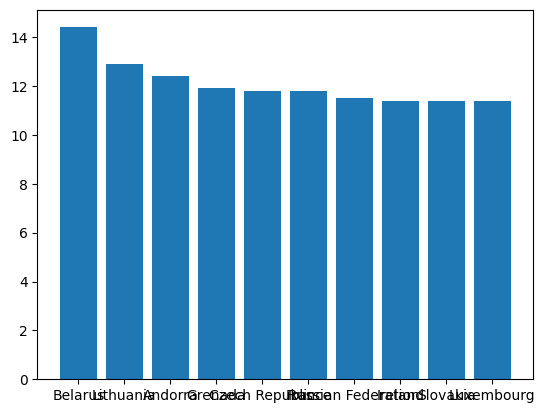

In [5]:
#알코올 소비량 탑 10의 그래프
plt.bar(total['country'].head(10) , total['total_litres_of_pure_alcohol'].head(10))
plt.show()

In [6]:
total2 = df.loc[:,'total_litres_of_pure_alcohol':'continent'].groupby('continent').sum().sort_values('total_litres_of_pure_alcohol' , ascending = False)
total2

total_litres_of_pure_alcohol
continent                              
EU                                387.8
AF                                159.4
OT                                137.9
AS                                 95.5
SA                                 75.7
OC                                 54.1

In [7]:
# 대륙별 알코올 총 소비량의 순위
total3 = pd.DataFrame(total2)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50508 (\N{HANGUL SYLLABLE AL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50732 (\N{HANGUL SYLLABLE OL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPyth

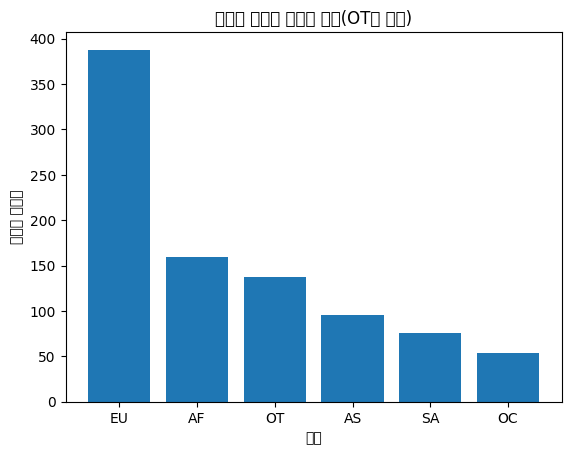

In [8]:
plt.bar(total3.index , total3['total_litres_of_pure_alcohol'])
plt.title('대륙별 알코올 소비량 순위(OT는 기타)')
plt.xlabel('대륙')
plt.ylabel('알코올 소비량')
plt.show()